In [1]:
import nltk
from konlpy.corpus import kobill

In [2]:
doc_ko = kobill.open('1809890.txt').read()

In [3]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

# Twitter engine으로 명사 분석

In [4]:
from konlpy.tag import Okt

In [ ]:
t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko # 명사 분석된 단어들의 집합

In [6]:
ko = nltk.Text(tokens_ko, name='육아휴직법')
ko

<Text: 육아휴직법>

In [10]:
#명사의 개수(중복)
len(ko.tokens)

735

In [9]:
# 중복 제거된 명사의 개수
len(set(ko.tokens))

250

In [11]:
#빈도수
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='Malgun Gothic')

### 그래프 시각화

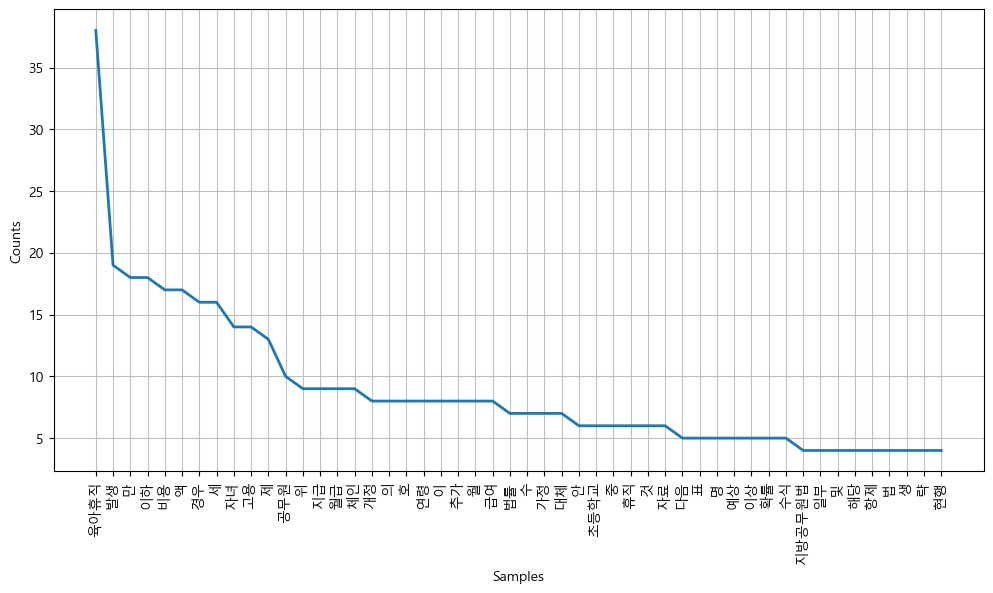

In [16]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

### stop_words 제거

In [17]:
stop_words = ['.','(','(',',',"'",'%','-','X',').','x','의','자','에','안','번','호','을','이','다','만','로','가','를']

In [ ]:
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

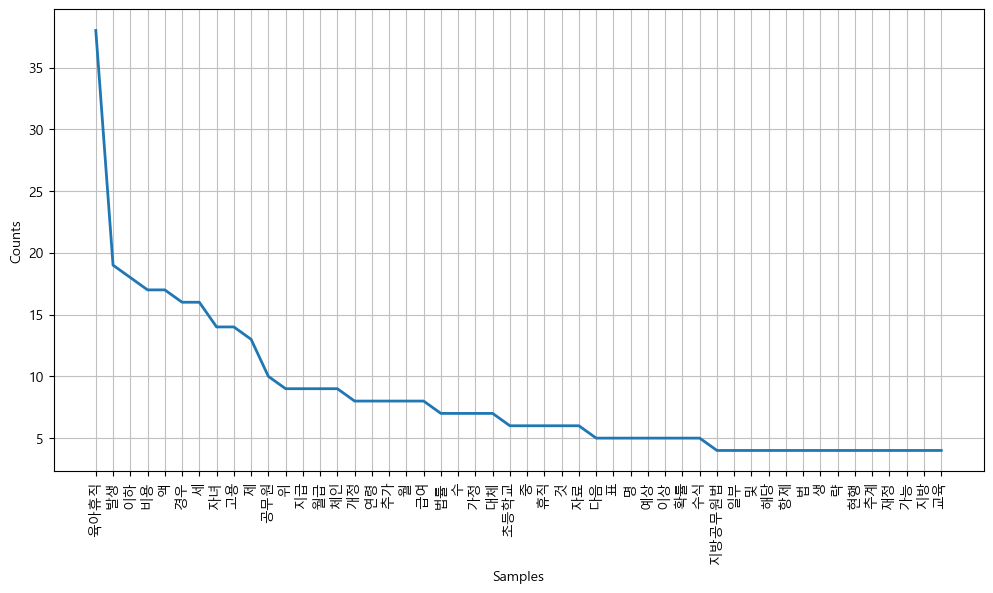

In [21]:
ko = nltk.Text(ko, name='육아휴직법')
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

### 특정 단어가 어디쯤 위치하는지 시각화

<Figure size 1200x600 with 0 Axes>

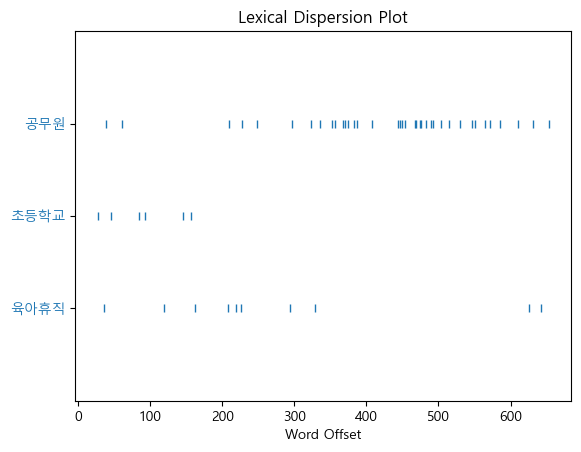

In [24]:
plt.figure(figsize=(12, 6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])

### Collocation : 연어
- 함께 위치하는 단어들.
- ex) friend - best, good, loyal

In [25]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


### wordcloud

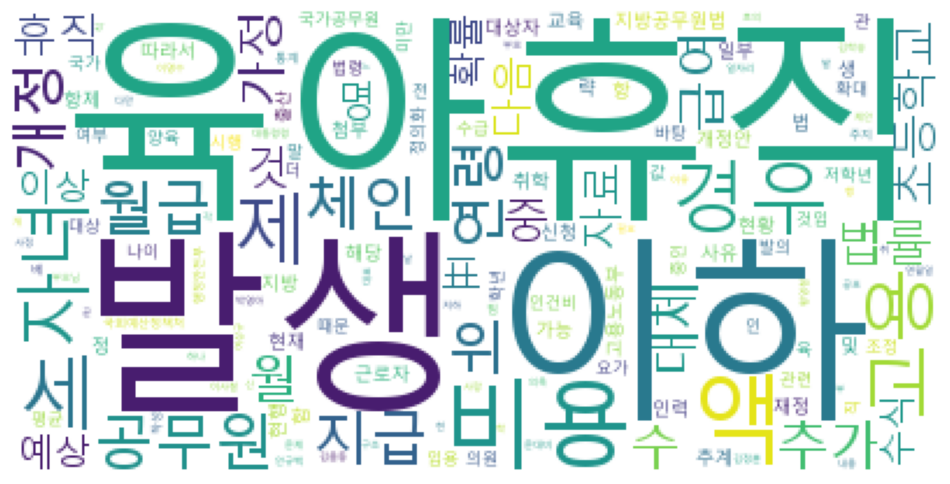

In [38]:
from wordcloud import WordCloud
data = ko.vocab().most_common(150)

wordcloud = WordCloud(
    font_path = r'C:\\Windows\Fonts\Malgun.ttf',
    relative_scaling=0.2, # WordCloud 단어 사이 간격
    background_color='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()